In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import data
from metrics import score

KAGGLE = False
if KAGGLE:
    data.set_path('/kaggle/input/it-purple-hack-alpha/')

In [63]:
train = data.get_train_data()
train = train.convert_dtypes()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 93 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       600000 non-null  Int64  
 1   date                     600000 non-null  string 
 2   balance_amt_avg          534423 non-null  Float64
 3   balance_amt_max          534423 non-null  Float64
 4   balance_amt_min          534423 non-null  Float64
 5   balance_amt_day_avg      534423 non-null  Float64
 6   channel_code             557150 non-null  string 
 7   city                     521656 non-null  string 
 8   city_type                521656 non-null  string 
 9   index_city_code          274776 non-null  string 
 10  ogrn_days_end_month      568527 non-null  Float64
 11  ogrn_days_end_quarter    568527 non-null  Float64
 12  ogrn_month               568527 non-null  string 
 13  ogrn_year                568527 non-null  string 
 14  ft_r

In [64]:
train.describe()

,id,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,ogrn_days_end_month,ogrn_days_end_quarter,ft_registration_date,max_founderpres,min_founderpres,...,cnt_days_deb_g_oper_3m,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m
count,600000.0,534423.0,534423.0,534423.0,534423.0,568527.0,568527.0,568640.0,264408.0,264408.0,...,434748.0,600000.0,434748.0,434748.0,600000.0,434748.0,434748.0,600000.0,434748.0,434748.0
mean,99999.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,0.810852,0.0,0.946172,0.41092,0.0,0.551292,0.507565,0.0,0.255424,0.456226
std,57735.075031,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000002,1.000002,...,0.145072,1.000001,0.011519,0.080259,1.000001,0.014255,0.156156,1.000001,0.01732,0.136101
min,0.0,-0.156778,-0.204962,-0.125995,-0.156315,-1.649833,-1.722458,-1.081749,-1.149405,-1.075208,...,0.728507,-0.028584,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201132,0.250924,0.37454
25%,49999.75,-0.156093,-0.204276,-0.125912,-0.155653,-0.836937,-0.870685,-0.756218,-0.760881,-0.766869,...,0.728507,-0.028584,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201123,0.250924,0.37454
50%,99999.5,-0.149948,-0.19031,-0.12487,-0.149586,-0.024041,-0.018912,-0.31512,-0.276488,-0.296553,...,0.750485,-0.028584,0.944497,0.384773,-0.165588,0.547176,0.429909,-0.201123,0.251501,0.396518
75%,149999.25,-0.103378,-0.106326,-0.11248,-0.10332,0.788855,0.871577,0.404024,0.451993,0.455432,...,0.816419,-0.028584,0.944889,0.396267,-0.143618,0.549755,0.54102,-0.138444,0.254101,0.473441
max,199999.0,154.240651,117.495722,91.450771,154.719284,1.834007,1.800784,3.032875,3.376642,3.592823,...,1.728507,365.960327,1.944497,1.384773,247.459963,1.546889,1.407687,107.581823,1.250924,1.37454


In [65]:
train.city.value_counts()

city
city_0       86234
city_14      39358
city_21      16398
city_6       15358
city_22      11674
             ...  
city_5275        1
city_8870        1
city_8441        1
city_8799        1
city_8841        1
Name: count, Length: 8917, dtype: Int64

In [66]:
train.segment.value_counts()

segment
segment_3    341965
segment_0     91940
segment_2     80996
segment_1     54948
Name: count, dtype: Int64

In [67]:
train.start_cluster.value_counts()

start_cluster
{α}          375947
{}            78803
{α, η}        43824
{α, γ}        32790
{other}       31813
{α, β}         9869
{α, δ}         8537
{α, ε}         5843
{α, θ}         4968
{α, ψ}         3000
{α, μ}         1341
{α, ε, η}      1207
{α, ε, θ}       851
{α, λ}          739
{α, ε, ψ}       374
{λ}              69
{α, π}           25
Name: count, dtype: Int64

In [68]:
# Процент оставшихся клиентов по кластеру, в среднем
(train.end_cluster.value_counts() / train.start_cluster.value_counts()).sort_values(ascending=False)

{λ}          2.028986
{α, μ}       1.583147
{}           1.552809
{other}      1.483576
{α, ε, η}     1.38691
{α, ε, θ}    1.321974
{α, θ}       1.310588
{α, λ}       1.181326
{α, β}       1.135171
{α, γ}       1.051266
{α, ψ}       0.976333
{α, ε, ψ}    0.965241
{α, ε}        0.93274
{α, η}       0.931225
{α}          0.847646
{α, π}           0.76
{α, δ}       0.477685
Name: count, dtype: Float64

<Axes: xlabel='end_cluster', ylabel='start_cluster'>

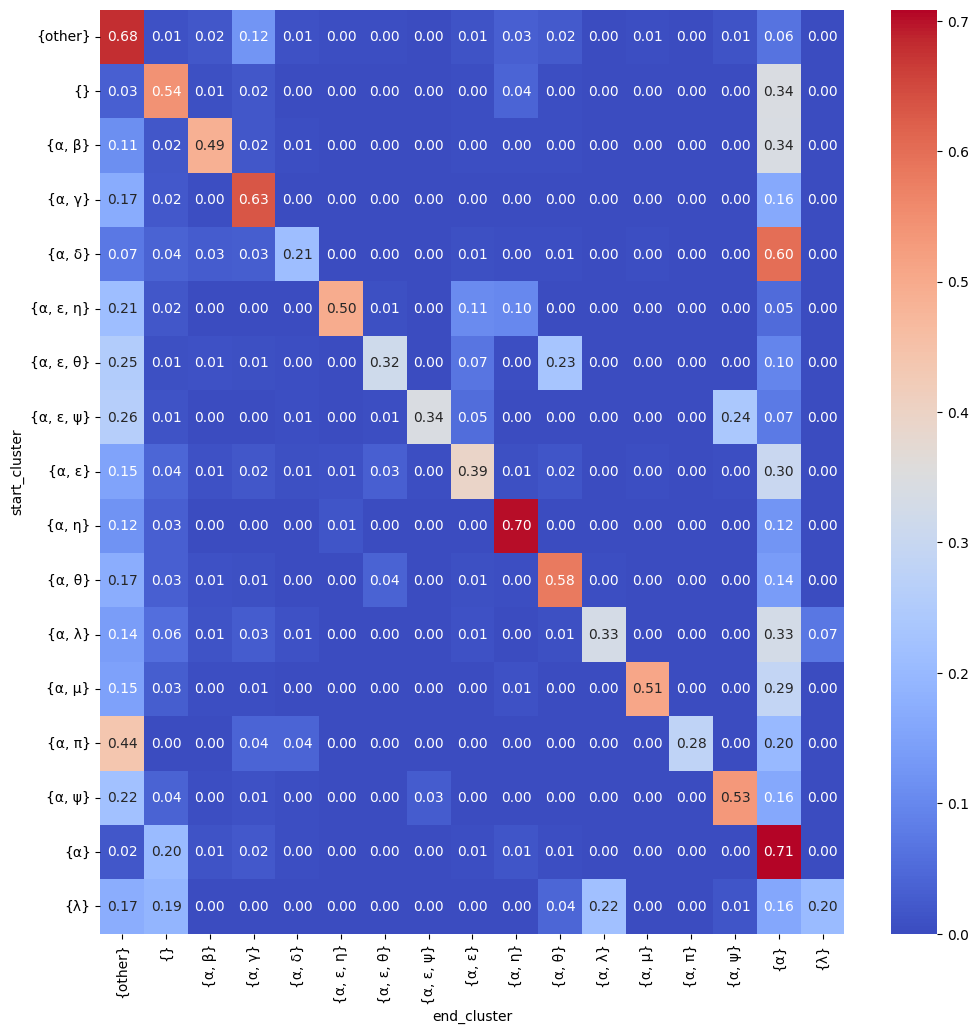

In [69]:
# Тепловая карта переходовб нормализованная по строкам
cross = pd.crosstab(train.start_cluster, train.end_cluster, normalize='index')
plt.figure(figsize=(12, 12))
sns.heatmap(cross, cmap='coolwarm', annot=True, fmt='.2f')

In [70]:
probability_predictions = cross.loc[train.start_cluster].values
y_true = train.end_cluster.values
score(y_true, probability_predictions)

0.8137253568976719

In [71]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.2, random_state=42, shuffle=False)

cross_train = pd.crosstab(train.start_cluster, train.end_cluster, normalize='index')
val_pred = cross_train.loc[val.start_cluster].values
val_true = val.end_cluster.values
score(val_true, val_pred)

0.811467134350189

<Axes: xlabel='end_cluster', ylabel='start_cluster'>

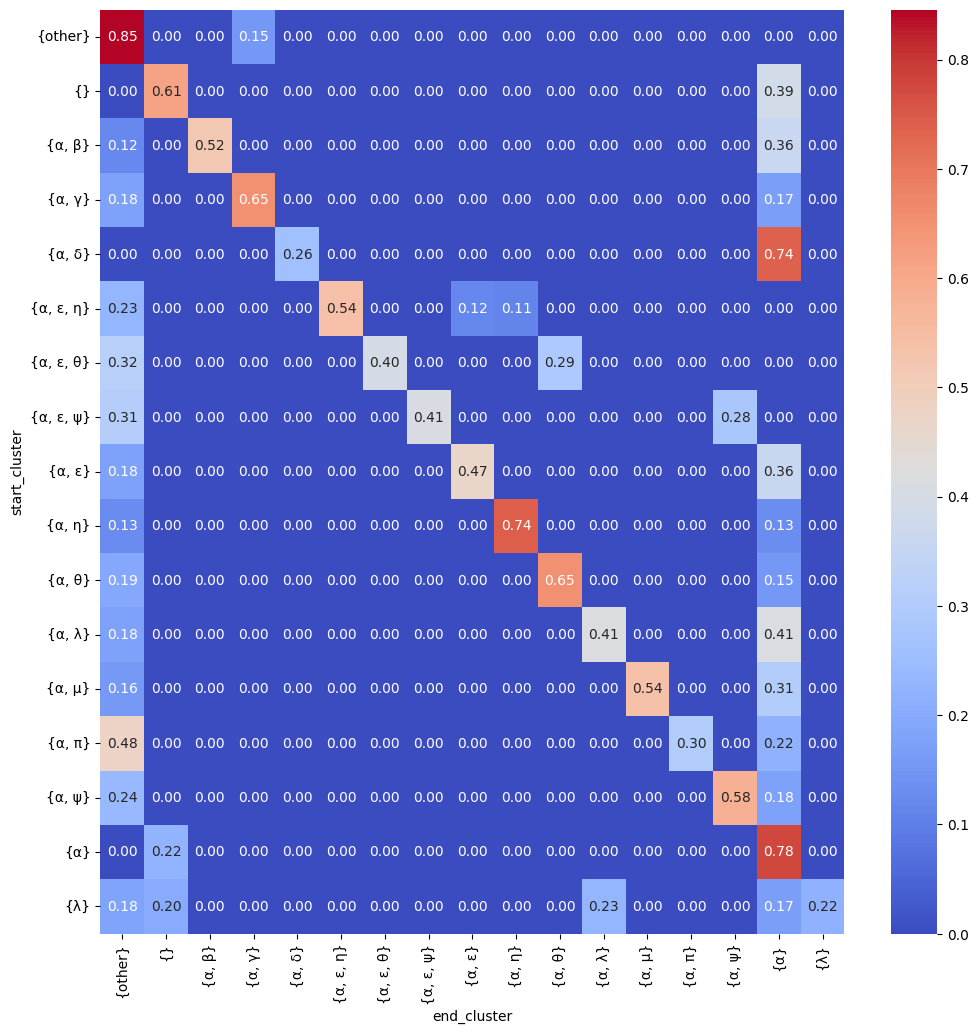

In [72]:
cross_high = cross.copy()
cross_high[cross_high < 0.1] = 0
cross_high = cross_high.div(cross_high.sum(axis=1), axis=0)
plt.figure(figsize=(12, 12))
sns.heatmap(cross_high, cmap='coolwarm', annot=True, fmt='.2f')

In [73]:
nans = train.select_dtypes(include='string').isna().sum()
nans[nans > 0]

channel_code        34458
city                62808
city_type           62808
index_city_code    260232
ogrn_month          25368
ogrn_year           25368
okved               25705
segment             24307
dtype: int64

In [74]:
nans = train.select_dtypes(include='number').isna().sum()
nans[nans > 0]

balance_amt_avg             52630
balance_amt_max             52630
balance_amt_min             52630
balance_amt_day_avg         52630
ogrn_days_end_month         25368
ogrn_days_end_quarter       25368
ft_registration_date        25248
max_founderpres            268663
min_founderpres            268663
ogrn_exist_months           25368
sum_of_paym_2m             119225
sum_of_paym_6m             119225
sum_of_paym_1y             119225
cnt_a_oper_1m              157220
cnt_b_oper_1m              157220
cnt_c_oper_1m              157220
cnt_deb_d_oper_1m          157220
cnt_cred_d_oper_1m         157220
cnt_deb_e_oper_1m          157220
cnt_days_deb_e_oper_1m     157220
cnt_cred_e_oper_1m         157220
cnt_days_cred_e_oper_1m    157220
cnt_deb_f_oper_1m          157220
cnt_days_deb_f_oper_1m     157220
cnt_cred_f_oper_1m         157220
cnt_days_cred_f_oper_1m    157220
cnt_deb_g_oper_1m          157220
cnt_days_deb_g_oper_1m     157220
cnt_cred_g_oper_1m         157220
cnt_days_cred_

In [75]:
train.ogrn_exist_months.describe()

count    454632.0
mean    -0.000282
std      1.001232
min     -1.093396
25%     -0.762873
50%     -0.310579
75%      0.402655
max      3.029441
Name: ogrn_exist_months, dtype: Float64

In [76]:
month_1 = train[train.date == 'month_1']
month_2 = train[train.date == 'month_2']
month_3 = train[train.date == 'month_3']

print((month_1.start_cluster.reset_index() == month_2.start_cluster.reset_index()).start_cluster.value_counts())
print((month_2.start_cluster.reset_index() == month_3.start_cluster.reset_index()).start_cluster.value_counts())

start_cluster
True     145283
False     14717
Name: count, dtype: Int64
start_cluster
True     141010
False     18990
Name: count, dtype: Int64


<Axes: xlabel='col_0', ylabel='row_0'>

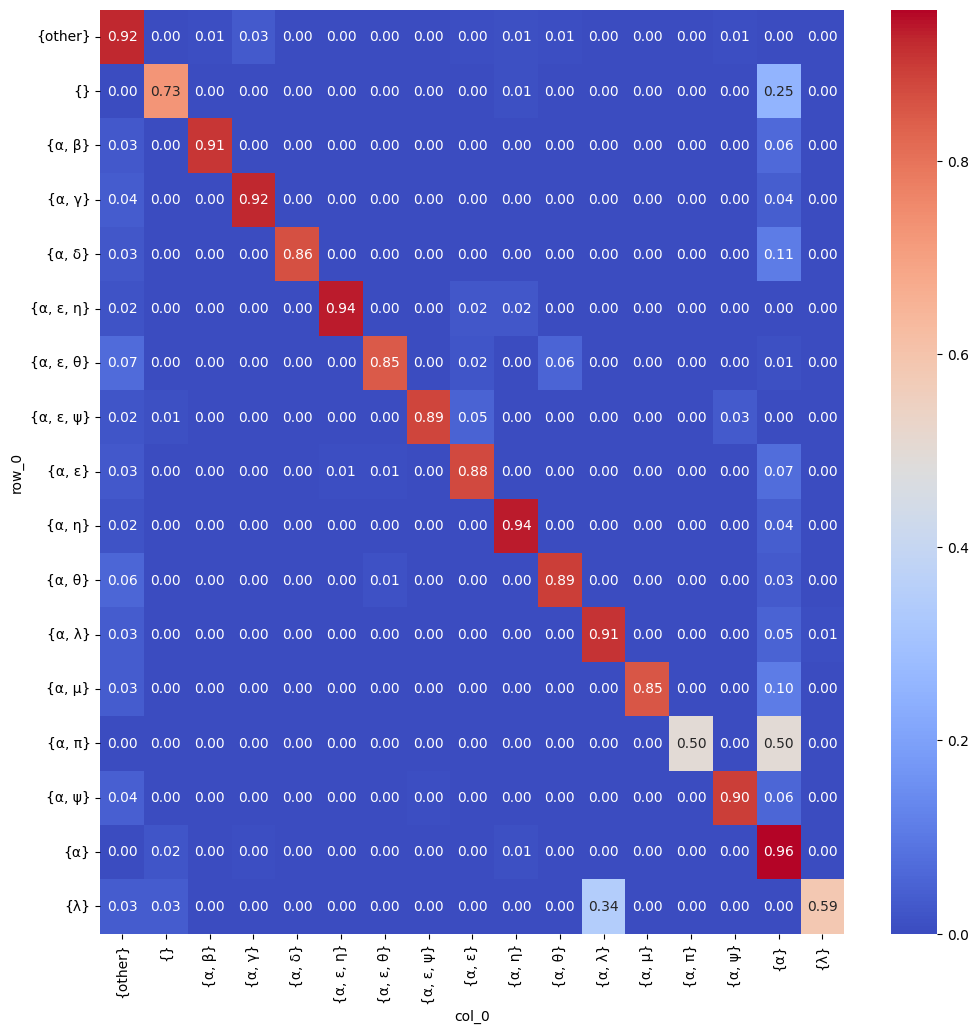

In [77]:
# Переходы за 1 месяц
cross_1 = pd.crosstab(month_1.start_cluster.values, month_2.start_cluster.values, normalize='index')
plt.figure(figsize=(12, 12))
sns.heatmap(cross_1, cmap='coolwarm', annot=True, fmt='.2f')

<Axes: xlabel='col_0', ylabel='row_0'>

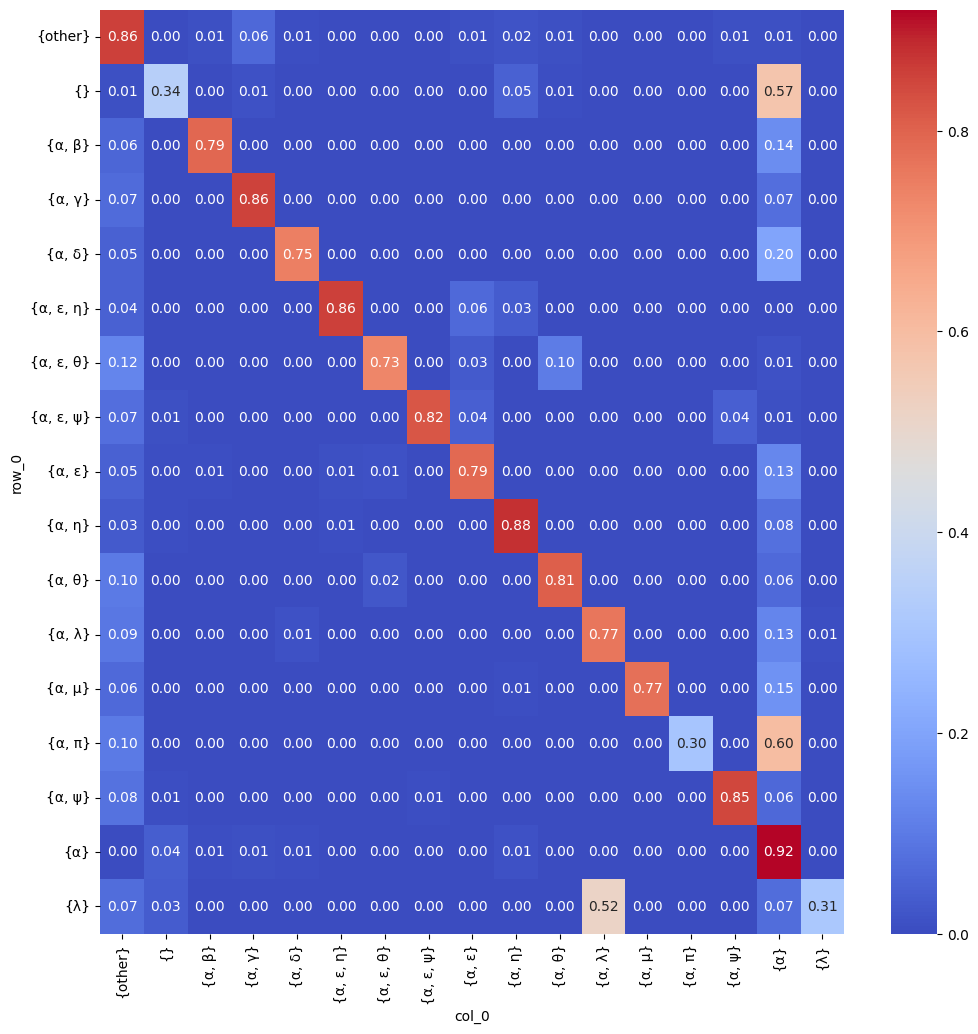

In [78]:
# Переходы за 2 месяца
cross_2 = pd.crosstab(month_1.start_cluster.values, month_3.start_cluster.values, normalize='index')
plt.figure(figsize=(12, 12))
sns.heatmap(cross_2, cmap='coolwarm', annot=True, fmt='.2f')

In [79]:
month1_no_index = month_1.reset_index(drop=True)
month2_no_index = month_2.reset_index(drop=True)
month3_no_index = month_3.reset_index(drop=True)

transitions1 = month1_no_index[(month1_no_index.start_cluster != month2_no_index.start_cluster)].index
transitions2 = month1_no_index[(month2_no_index.start_cluster != month3_no_index.start_cluster)].index

print(f'Переходов за первый месяц: {len(transitions1)}')
print(f'Переходов за второй месяц: {len(transitions2)}')
print(f'Переходов за оба месяца: {len(set(transitions1) & set(transitions2))}')

Переходов за первый месяц: 14717
Переходов за второй месяц: 18990
Переходов за оба месяца: 1656


In [80]:
print(len(transitions1) * len(transitions2) / len(month1_no_index) ** 2)
print(len(set(transitions1) & set(transitions2)) / len(month1_no_index))

0.010917024609375
0.01035


<Axes: xlabel='col_0', ylabel='row_0'>

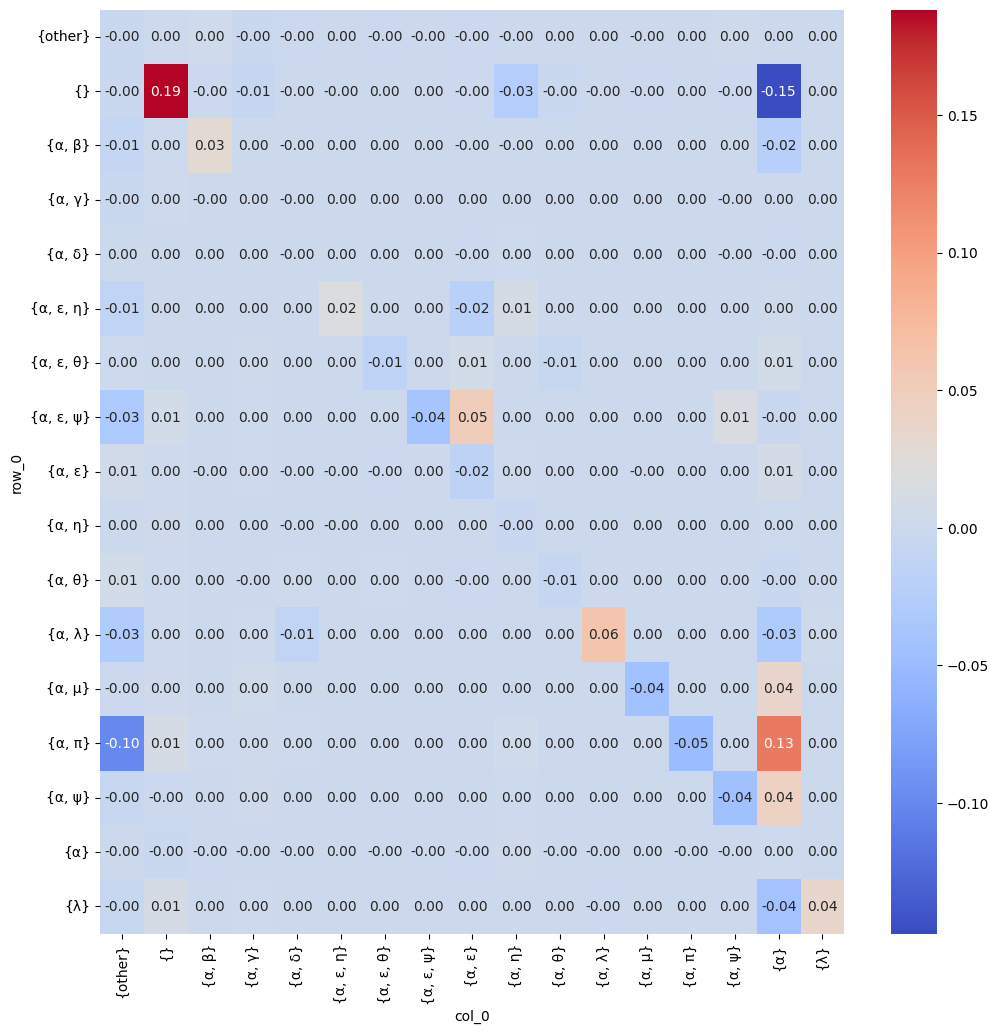

In [81]:
# Разница между вероятностью двух последовательных переходов в предположении что они независимы и реальной вероятностью
# Показывает насколько реальность похожа на марковский процесс 
cross2_approx = cross_1 @ cross_1
diff = cross2_approx - cross_2
plt.figure(figsize=(12, 12))
sns.heatmap(diff, cmap='coolwarm', annot=True, fmt='.2f')

<Axes: xlabel='end_cluster', ylabel='start_cluster'>

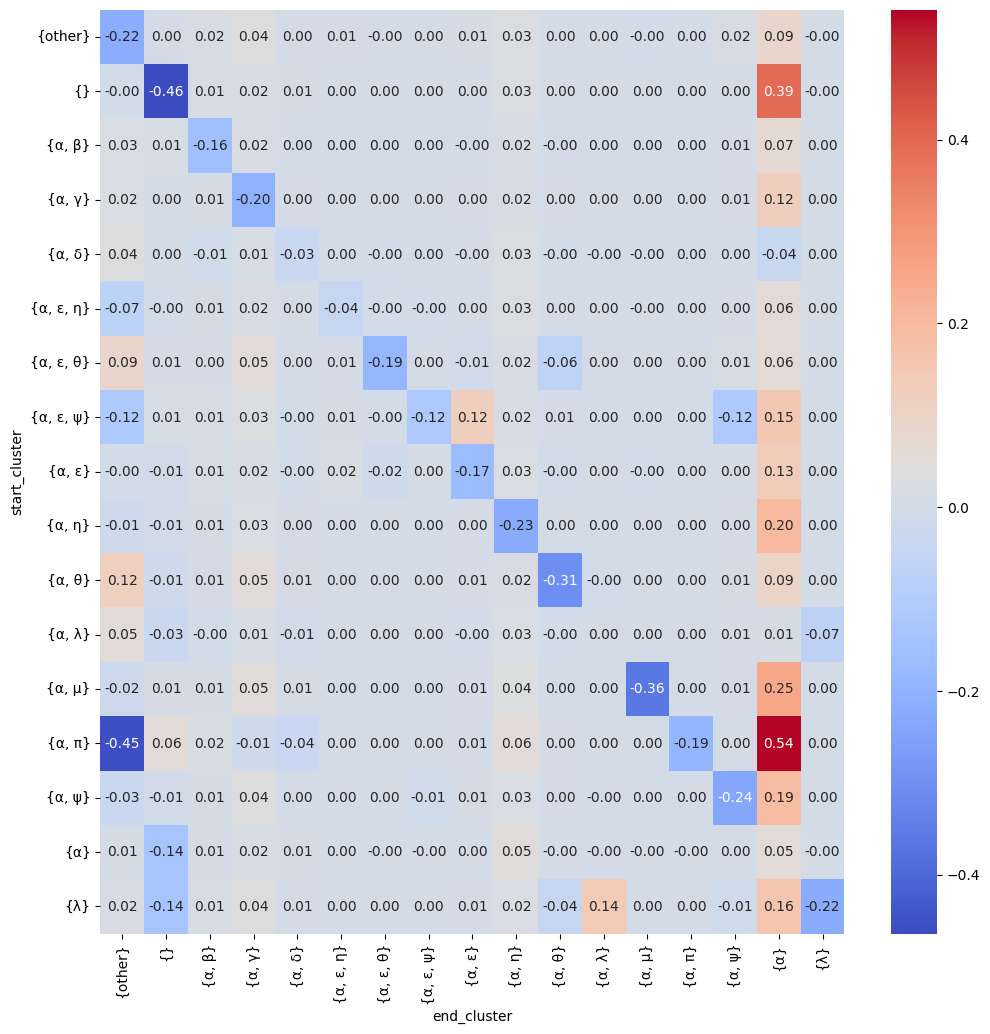

In [82]:
cross_year_approx = np.linalg.matrix_power(cross_1, 12)
diff = cross_year_approx - cross_train
plt.figure(figsize=(12, 12))
sns.heatmap(diff, cmap='coolwarm', annot=True, fmt='.2f')

<Axes: xlabel='end_cluster', ylabel='start_cluster'>

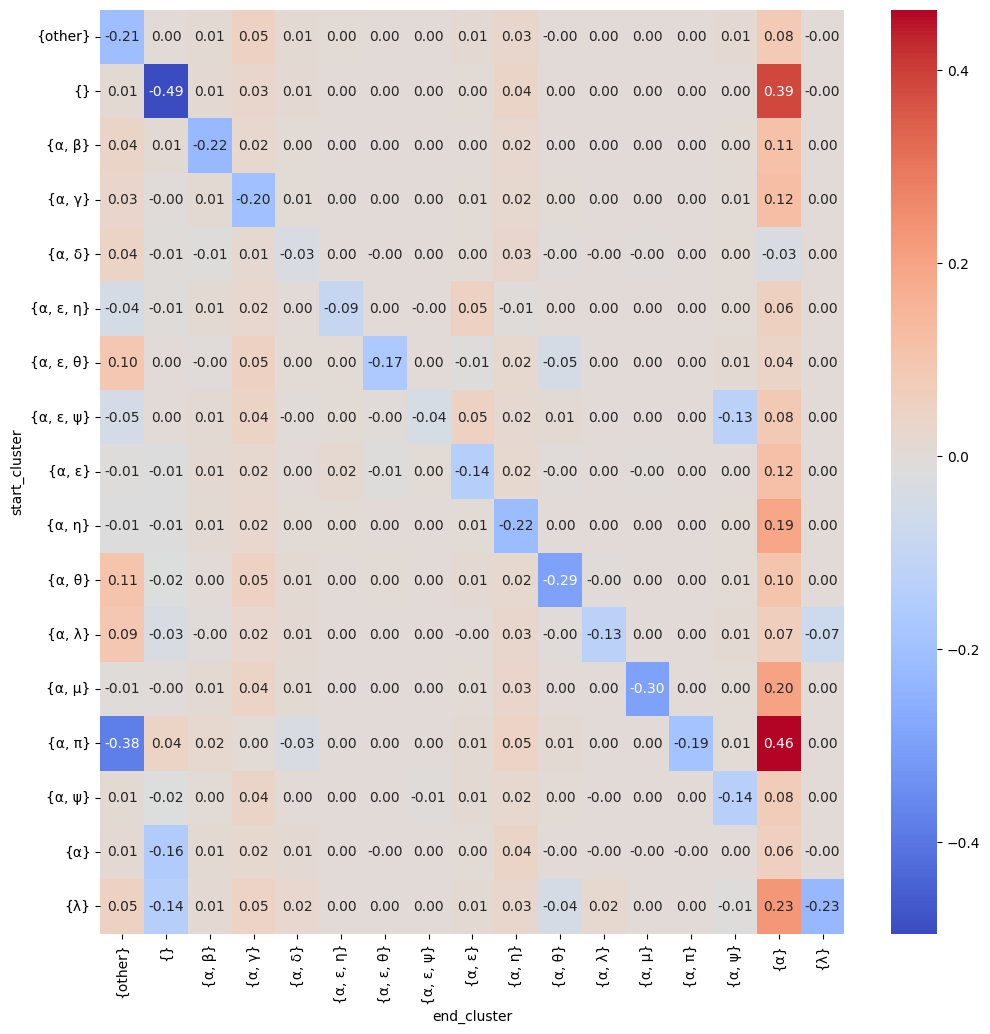

In [83]:
cross_year_approx = np.linalg.matrix_power(cross_2, 6)
diff = cross_year_approx - cross_train
plt.figure(figsize=(12, 12))
sns.heatmap(diff, cmap='coolwarm', annot=True, fmt='.2f')